In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_recall_curve,roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import sklearn
import sklearn.metrics as metrics
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [119]:
#Opening all csv's
df1 = pd.read_csv('Youtube01-Psy.csv')
df2 = pd.read_csv('Youtube02-KatyPerry.csv')
df3 = pd.read_csv('Youtube03-LMFAO.csv')
df4 = pd.read_csv('Youtube04-Eminem.csv')
df5 = pd.read_csv('Youtube05-Shakira.csv')
df1

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...,...,...
345,z13th1q4yzihf1bll23qxzpjeujterydj,Carmen Racasanu,2014-11-14T13:27:52,How can this have 2 billion views when there's...,0
346,z13fcn1wfpb5e51xe04chdxakpzgchyaxzo0k,diego mogrovejo,2014-11-14T13:28:08,I don't now why I'm watching this in 2014﻿,0
347,z130zd5b3titudkoe04ccbeohojxuzppvbg,BlueYetiPlayz -Call Of Duty and More,2015-05-23T13:04:32,subscribe to me for call of duty vids and give...,1
348,z12he50arvrkivl5u04cctawgxzkjfsjcc4,Photo Editor,2015-06-05T14:14:48,hi guys please my android photo editor downloa...,1


In [3]:
#Dropping unwanted columns
df1 = df1.drop(columns = ['COMMENT_ID', 'DATE'])
df2 = df2.drop(columns = ['COMMENT_ID', 'DATE'])
df3 = df3.drop(columns = ['COMMENT_ID', 'DATE'])
df4 = df4.drop(columns = ['COMMENT_ID', 'DATE'])
df5 = df5.drop(columns = ['COMMENT_ID', 'DATE'])

print(len(df1)+len(df2)+len(df3)+len(df4)+len(df5))

1956


In [4]:
#Combining all df
dfAll = pd.concat([df1,df2,df3,df4,df5], axis = 0)
len(dfAll)
dfAll = dfAll.reset_index().drop('index', axis=1)
dfAll

,AUTHOR,CONTENT,CLASS
0,Julius NM,"Huh, anyway check out this you[tube] channel: ...",1
1,adam riyati,Hey guys check out my new channel and our firs...,1
2,Evgeny Murashkin,just for test I have to say murdev.com,1
3,ElNino Melendez,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,GsMega,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...,...
1951,Katie Mettam,I love this song because we sing it at Camp al...,0
1952,Sabina Pearson-Smith,I love this song for two reasons: 1.it is abou...,0
1953,jeffrey jules,wow,0
1954,Aishlin Maciel,Shakira u are so wiredo,0


In [5]:
#Checking target class distribution - looks healthy!
dfAll['CLASS'].value_counts()

1    1005
0     951
Name: CLASS, dtype: int64

In [6]:
#Function to count special characters in a list
def special(_list):
    special_characters = ['[',']',':',';','<','>','@','#','=','$','%','^','&','*','\\','/','!','?','+','-']
    count_list = []
    for l in _list:
        count = 0
        for c in l:
            if c in special_characters:
                count+=1
        count_list.append(count)
    return(count_list)

In [7]:
#Creating new df columns for paramters
dfAll['C_LEN'] = [len(i) for i in dfAll['CONTENT']] #character length of comment
dfAll['A_LEN'] = [len(i) for i in dfAll['AUTHOR']] #character length of author name
dfAll['C_SPEC'] = special(dfAll['CONTENT']) #number of special characters in comment
dfAll['A_SPEC'] = special(dfAll['AUTHOR']) #number of special characters in author name

dfAll

,AUTHOR,CONTENT,CLASS,C_LEN,A_LEN,C_SPEC,A_SPEC
0,Julius NM,"Huh, anyway check out this you[tube] channel: ...",1,56,9,3,0
1,adam riyati,Hey guys check out my new channel and our firs...,1,166,11,7,0
2,Evgeny Murashkin,just for test I have to say murdev.com,1,38,16,0,0
3,ElNino Melendez,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,48,15,2,0
4,GsMega,watch?v=vtaRGgvGtWQ Check this out .﻿,1,39,6,2,0
...,...,...,...,...,...,...,...
1951,Katie Mettam,I love this song because we sing it at Camp al...,0,58,12,2,0
1952,Sabina Pearson-Smith,I love this song for two reasons: 1.it is abou...,0,93,20,1,1
1953,jeffrey jules,wow,0,3,13,0,0
1954,Aishlin Maciel,Shakira u are so wiredo,0,23,14,0,0


PART 1 - CUSTOM PARAMETERS

In [8]:
#Preparing variables for training
X=dfAll.drop(columns = ['AUTHOR','CONTENT','CLASS'])
y=dfAll['CLASS']

#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [9]:
#SVC: Testing several kernal types and C values
kernels = ['linear', 'rbf', 'poly']
C_values = [0.01, 0.1, 0.5, 1, 5, 10]
for kernel in kernels: 
    for c_val in C_values: 
        model = SVC(kernel=kernel, C=c_val, probability = True, random_state=10)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        print("using kernel {}".format(kernel) + ", C value is {}".format(c_val) +
              ", the acc is {0:.3f}".format(accuracy_score(y_test, pred)))
        print(confusion_matrix(y_test, pred))

using kernel linear, C value is 0.01, the acc is 0.641
[[249  52]
 [159 127]]
using kernel linear, C value is 0.1, the acc is 0.641
[[249  52]
 [159 127]]
using kernel linear, C value is 0.5, the acc is 0.642
[[247  54]
 [156 130]]
using kernel linear, C value is 1, the acc is 0.642
[[247  54]
 [156 130]]
using kernel linear, C value is 5, the acc is 0.641
[[246  55]
 [156 130]]
using kernel linear, C value is 10, the acc is 0.641
[[246  55]
 [156 130]]
using kernel rbf, C value is 0.01, the acc is 0.627
[[254  47]
 [172 114]]
using kernel rbf, C value is 0.1, the acc is 0.606
[[218  83]
 [148 138]]
using kernel rbf, C value is 0.5, the acc is 0.617
[[188 113]
 [112 174]]
using kernel rbf, C value is 1, the acc is 0.618
[[184 117]
 [107 179]]
using kernel rbf, C value is 5, the acc is 0.612
[[167 134]
 [ 94 192]]
using kernel rbf, C value is 10, the acc is 0.606
[[156 145]
 [ 86 200]]
using kernel poly, C value is 0.01, the acc is 0.596
[[296   5]
 [232  54]]
using kernel poly, C value

In [10]:
#SGDClassification
X=dfAll.drop(columns = ['AUTHOR','CONTENT','CLASS'])
y=dfAll['CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

losses = ['hinge', 'log_loss', 'log', 'modified_huber', 
          'squared_hinge', 'perceptron', 'squared_error',
          'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
penalties = ['l1','l2',None]
alphas = [0.001, .1, 1, 5, 10]
for _loss in losses: 
    for _penalty in penalties:
        for _alpha in alphas:
            model = SGDClassifier(loss=_loss, penalty=_penalty, alpha=_alpha, random_state=10)
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
            print("using loss {}".format(_loss) + ",  penalty is {}".format(_penalty) +
                  ",  alpha is {}".format(_alpha) + ", the acc is {0:.3f}".format(accuracy_score(y_test, pred)))
            print(confusion_matrix(y_test, pred))
            print(accuracy_score(y_test, pred))

using loss hinge,  penalty is l1,  alpha is 0.001, the acc is 0.514
[[301   0]
 [285   1]]
0.514480408858603
using loss hinge,  penalty is l1,  alpha is 0.1, the acc is 0.652
[[122 179]
 [ 25 261]]
0.6524701873935264
using loss hinge,  penalty is l1,  alpha is 1, the acc is 0.620
[[193 108]
 [115 171]]
0.6201022146507666
using loss hinge,  penalty is l1,  alpha is 5, the acc is 0.620
[[184 117]
 [106 180]]
0.6201022146507666
using loss hinge,  penalty is l1,  alpha is 10, the acc is 0.613
[[217  84]
 [143 143]]
0.6132879045996593
using loss hinge,  penalty is l2,  alpha is 0.001, the acc is 0.605
[[118 183]
 [ 49 237]]
0.6047700170357752
using loss hinge,  penalty is l2,  alpha is 0.1, the acc is 0.600
[[200 101]
 [134 152]]
0.5996592844974447
using loss hinge,  penalty is l2,  alpha is 1, the acc is 0.613
[[219  82]
 [145 141]]
0.6132879045996593
using loss hinge,  penalty is l2,  alpha is 5, the acc is 0.606
[[197 104]
 [127 159]]
0.606473594548552
using loss hinge,  penalty is l2,  

C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\eddie\anaconda3\lib\sit

0.5264054514480409
using loss log,  penalty is None,  alpha is 0.1, the acc is 0.618
[[186 115]
 [109 177]]
0.6183986371379898
using loss log,  penalty is None,  alpha is 1, the acc is 0.634
[[279  22]
 [193  93]]
0.6337308347529813
using loss log,  penalty is None,  alpha is 5, the acc is 0.612
[[220  81]
 [147 139]]
0.6115843270868825
using loss log,  penalty is None,  alpha is 10, the acc is 0.603
[[230  71]
 [162 124]]
0.6030664395229983
using loss modified_huber,  penalty is l1,  alpha is 0.001, the acc is 0.661
[[126 175]
 [ 24 262]]
0.6609880749574105
using loss modified_huber,  penalty is l1,  alpha is 0.1, the acc is 0.610
[[214  87]
 [142 144]]
0.6098807495741057
using loss modified_huber,  penalty is l1,  alpha is 1, the acc is 0.606
[[217  84]
 [147 139]]
0.606473594548552
using loss modified_huber,  penalty is l1,  alpha is 5, the acc is 0.627
[[248  53]
 [166 120]]
0.626916524701874
using loss modified_huber,  penalty is l1,  alpha is 10, the acc is 0.625
[[283  18]
 [202

C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


using loss perceptron,  penalty is None,  alpha is 10, the acc is 0.608
[[226  75]
 [155 131]]
0.6081771720613288
using loss squared_error,  penalty is l1,  alpha is 0.001, the acc is 0.501
[[293   8]
 [285   1]]
0.5008517887563884
using loss squared_error,  penalty is l1,  alpha is 0.1, the acc is 0.526
[[ 23 278]
 [  0 286]]
0.5264054514480409
using loss squared_error,  penalty is l1,  alpha is 1, the acc is 0.455
[[216  85]
 [235  51]]
0.454855195911414
using loss squared_error,  penalty is l1,  alpha is 5, the acc is 0.385
[[ 99 202]
 [159 127]]
0.3850085178875639
using loss squared_error,  penalty is l1,  alpha is 10, the acc is 0.533
[[254  47]
 [227  59]]
0.5332197614991482
using loss squared_error,  penalty is l2,  alpha is 0.001, the acc is 0.513
[[301   0]
 [286   0]]
0.5127768313458262
using loss squared_error,  penalty is l2,  alpha is 0.1, the acc is 0.508
[[297   4]
 [285   1]]
0.5076660988074957
using loss squared_error,  penalty is l2,  alpha is 1, the acc is 0.417
[[20

In [11]:
#DecisionTreeClassifier:
model = DecisionTreeClassifier(random_state = 10)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))

[[205  96]
 [ 94 192]]
0.676320272572402


In [12]:
#DecisionTree had the highest acc
model = DecisionTreeClassifier(random_state = 10)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))

[[205  96]
 [ 94 192]]
0.676320272572402


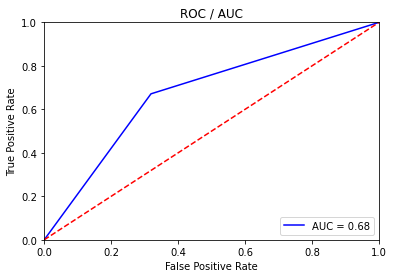

In [13]:
#Code taken from https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
#Generating ROC and AUC for Linear & C=1

# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC / AUC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
#Testing importance of each attribute
feat_labels = X.columns[:]

forest = RandomForestClassifier(random_state = 10)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1] 

for f in range(X_train.shape[1]):
    if f < 15:
        print("%2d) %-*s %f" % (f + 1, 41, feat_labels[indices[f]], importances[indices[f]]))


 1) C_LEN                                     0.581792
 2) A_LEN                                     0.207746
 3) C_SPEC                                    0.200967
 4) A_SPEC                                    0.009494


In [17]:
#It appears that A_SPEC is insignifant. Let's try running the model without it
X=dfAll.drop(columns = ['AUTHOR','CONTENT','CLASS','A_SPEC'])
y=dfAll['CLASS']

#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [18]:
#SVC: Testing several kernal types and C values
kernels = ['linear', 'rbf', 'poly']
C_values = [0.01, 0.1, 0.5, 1, 5, 10]
for kernel in kernels: 
    for c_val in C_values: 
        model = SVC(kernel=kernel, C=c_val, probability = True, random_state=10)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        print("using kernel {}".format(kernel) + ", C value is {}".format(c_val) +
              ", the acc is {0:.3f}".format(accuracy_score(y_test, pred)))
        print(confusion_matrix(y_test, pred))

using kernel linear, C value is 0.01, the acc is 0.639
[[249  52]
 [160 126]]
using kernel linear, C value is 0.1, the acc is 0.639
[[249  52]
 [160 126]]
using kernel linear, C value is 0.5, the acc is 0.639
[[249  52]
 [160 126]]
using kernel linear, C value is 1, the acc is 0.639
[[249  52]
 [160 126]]
using kernel linear, C value is 5, the acc is 0.639
[[249  52]
 [160 126]]
using kernel linear, C value is 10, the acc is 0.639
[[249  52]
 [160 126]]
using kernel rbf, C value is 0.01, the acc is 0.627
[[253  48]
 [171 115]]
using kernel rbf, C value is 0.1, the acc is 0.612
[[217  84]
 [144 142]]
using kernel rbf, C value is 0.5, the acc is 0.618
[[187 114]
 [110 176]]
using kernel rbf, C value is 1, the acc is 0.620
[[183 118]
 [105 181]]
using kernel rbf, C value is 5, the acc is 0.612
[[166 135]
 [ 93 193]]
using kernel rbf, C value is 10, the acc is 0.605
[[154 147]
 [ 85 201]]
using kernel poly, C value is 0.01, the acc is 0.596
[[296   5]
 [232  54]]
using kernel poly, C value

In [19]:
#SGDClassification
X=dfAll.drop(columns = ['AUTHOR','CONTENT','CLASS'])
y=dfAll['CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

losses = ['hinge', 'log_loss', 'log', 'modified_huber', 
          'squared_hinge', 'perceptron', 'squared_error',
          'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
penalties = ['l1','l2',None]
alphas = [0.001, .1, 1, 5, 10]
for _loss in losses: 
    for _penalty in penalties:
        for _alpha in alphas:
            model = SGDClassifier(loss=_loss, penalty=_penalty, alpha=_alpha, random_state=10)
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
            print("using loss {}".format(_loss) + ",  penalty is {}".format(_penalty) +
                  ",  alpha is {}".format(_alpha) + ", the acc is {0:.3f}".format(accuracy_score(y_test, pred)))
            print(confusion_matrix(y_test, pred))
            print(accuracy_score(y_test, pred))

using loss hinge,  penalty is l1,  alpha is 0.001, the acc is 0.514
[[301   0]
 [285   1]]
0.514480408858603
using loss hinge,  penalty is l1,  alpha is 0.1, the acc is 0.652
[[122 179]
 [ 25 261]]
0.6524701873935264
using loss hinge,  penalty is l1,  alpha is 1, the acc is 0.620
[[193 108]
 [115 171]]
0.6201022146507666
using loss hinge,  penalty is l1,  alpha is 5, the acc is 0.620
[[184 117]
 [106 180]]
0.6201022146507666
using loss hinge,  penalty is l1,  alpha is 10, the acc is 0.613
[[217  84]
 [143 143]]
0.6132879045996593
using loss hinge,  penalty is l2,  alpha is 0.001, the acc is 0.605
[[118 183]
 [ 49 237]]
0.6047700170357752
using loss hinge,  penalty is l2,  alpha is 0.1, the acc is 0.600
[[200 101]
 [134 152]]
0.5996592844974447
using loss hinge,  penalty is l2,  alpha is 1, the acc is 0.613
[[219  82]
 [145 141]]
0.6132879045996593
using loss hinge,  penalty is l2,  alpha is 5, the acc is 0.606
[[197 104]
 [127 159]]
0.606473594548552
using loss hinge,  penalty is l2,  

C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\eddie\anaconda3\lib\sit

[[296   5]
 [273  13]]
0.5264054514480409
using loss log,  penalty is None,  alpha is 0.1, the acc is 0.618
[[186 115]
 [109 177]]
0.6183986371379898
using loss log,  penalty is None,  alpha is 1, the acc is 0.634
[[279  22]
 [193  93]]
0.6337308347529813
using loss log,  penalty is None,  alpha is 5, the acc is 0.612
[[220  81]
 [147 139]]
0.6115843270868825
using loss log,  penalty is None,  alpha is 10, the acc is 0.603
[[230  71]
 [162 124]]
0.6030664395229983
using loss modified_huber,  penalty is l1,  alpha is 0.001, the acc is 0.661
[[126 175]
 [ 24 262]]
0.6609880749574105
using loss modified_huber,  penalty is l1,  alpha is 0.1, the acc is 0.610
[[214  87]
 [142 144]]
0.6098807495741057
using loss modified_huber,  penalty is l1,  alpha is 1, the acc is 0.606
[[217  84]
 [147 139]]
0.606473594548552
using loss modified_huber,  penalty is l1,  alpha is 5, the acc is 0.627
[[248  53]
 [166 120]]
0.626916524701874
using loss modified_huber,  penalty is l1,  alpha is 10, the acc is

C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[[224  77]
 [156 130]]
0.6030664395229983
using loss perceptron,  penalty is None,  alpha is 10, the acc is 0.608
[[226  75]
 [155 131]]
0.6081771720613288
using loss squared_error,  penalty is l1,  alpha is 0.001, the acc is 0.501
[[293   8]
 [285   1]]
0.5008517887563884
using loss squared_error,  penalty is l1,  alpha is 0.1, the acc is 0.526
[[ 23 278]
 [  0 286]]
0.5264054514480409
using loss squared_error,  penalty is l1,  alpha is 1, the acc is 0.455
[[216  85]
 [235  51]]
0.454855195911414
using loss squared_error,  penalty is l1,  alpha is 5, the acc is 0.385
[[ 99 202]
 [159 127]]
0.3850085178875639
using loss squared_error,  penalty is l1,  alpha is 10, the acc is 0.533
[[254  47]
 [227  59]]
0.5332197614991482
using loss squared_error,  penalty is l2,  alpha is 0.001, the acc is 0.513
[[301   0]
 [286   0]]
0.5127768313458262
using loss squared_error,  penalty is l2,  alpha is 0.1, the acc is 0.508
[[297   4]
 [285   1]]
0.5076660988074957
using loss squared_error,  penalty

In [20]:
#DecisionTreeClassifier:
model = DecisionTreeClassifier(random_state = 10)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))

[[205  96]
 [ 94 192]]
0.676320272572402


In [21]:
#DecisionTree had highest acc
model = DecisionTreeClassifier(random_state = 10)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))

[[205  96]
 [ 94 192]]
0.676320272572402


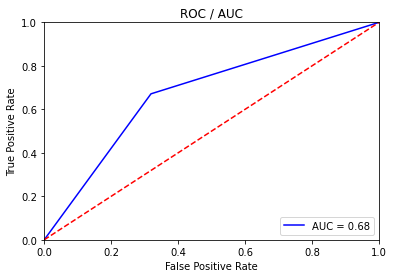

In [22]:
#Code taken from https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
#Generating ROC and AUC for Linear & C=1

# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC / AUC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Part 2 - Using NLP

In [114]:
import nltk
from nltk.corpus import stopwords
from collections import Counter


nltk.download('wordnet')
nltk.download('stopwords')


tokenizer = nltk.RegexpTokenizer(r"\w+")
stopwords = stopwords.words('english')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eddie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eddie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [122]:
dfSpam = dfAll.drop(columns = ['AUTHOR','C_LEN','A_LEN','C_SPEC','A_SPEC'])
dfSpam = dfSpam[dfSpam['CLASS']==1]
dfSpam = dfSpam.reset_index().drop('index', axis=1)

dfHam = dfAll.drop(columns = ['AUTHOR','C_LEN','A_LEN','C_SPEC','A_SPEC'])
dfHam= dfHam[dfHam['CLASS']==0]
dfHam = dfHam.reset_index().drop('index', axis=1)

,CONTENT,CLASS
0,i turned it on mute as soon is i came on i jus...,0
1,I'm only checking the views﻿,0
2,i think about 100 millions of the views come f...,0
3,just checking the views﻿,0
4,I dont even watch it anymore i just come here ...,0
...,...,...
946,I love this song because we sing it at Camp al...,0
947,I love this song for two reasons: 1.it is abou...,0
948,wow,0
949,Shakira u are so wiredo,0


In [118]:
tokens_spam = []
for comment in dfSpam['CONTENT']:
    for i in (tokenizer.tokenize(comment)):
        tokens_spam.append(i.lower())

tokens_spam_nostop = [i for i in tokens_spam if i not in stopwords]
print("Spam tokens before no stop:",len(tokens_spam), "\nSpam after no stop removed:", len(tokens_spam_nostop))


tokens_ham = []
for comment in dfHam['CONTENT']:
    for i in (tokenizer.tokenize(comment)):
        tokens_ham.append(i.lower())

tokens_ham_nostop = [i for i in tokens_ham if i not in stopwords]
print("Ham tokens before no stop:", len(tokens_ham), "\nHam after no stop removed:", len(tokens_ham_nostop))

Spam tokens before no stop: 24655 
Spam after no stop removed: 14855
Ham tokens before no stop: 8879 
Ham after no stop removed: 5064


In [111]:
print("Most common tokens in Spam:")
Counter(tokens_spam_nostop).most_common()[:10]

Most common tokens in Spam:


[('check', 559),
 ('com', 296),
 ('please', 246),
 ('youtube', 235),
 ('subscribe', 229),
 ('video', 229),
 ('39', 210),
 ('channel', 197),
 ('br', 195),
 ('like', 160)]

In [146]:
print("Most common tokens in Ham:")
Counter(tokens_ham_nostop).most_common()[:10]

Most common tokens in Ham:


[('song', 224),
 ('love', 145),
 ('like', 90),
 ('views', 87),
 ('video', 84),
 ('br', 64),
 ('best', 57),
 ('katy', 56),
 ('2', 55),
 ('billion', 51)]

In [147]:
dfNew = dfAll.drop(columns=['C_LEN','A_LEN','C_SPEC','A_SPEC'])

check = []
for i in dfNew['CONTENT']:
    if 'check' in i.lower():
        check.append(1)
    else:
        check.append(0)

com = []
for i in dfNew['CONTENT']:
    if 'com' in i.lower():
        com.append(1)
    else:
        com.append(0)    
        
please = []
for i in dfNew['CONTENT']:
    if 'please' in i.lower():
        please.append(1)
    else:
        please.append(0)
        
youtube = []
for i in dfNew['CONTENT']:
    if 'youtube' in i.lower():
        youtube.append(1)
    else:
        youtube.append(0)
        
subscribe = []
for i in dfNew['CONTENT']:
    if 'subscribe' in i.lower():
        subscribe.append(1)
    else:
        subscribe.append(0)
        
channel = []
for i in dfNew['CONTENT']:
    if 'channel' in i.lower():
        channel.append(1)
    else:
        channel.append(0)
        
song = []
for i in dfNew['CONTENT']:
    if 'song' in i.lower():
        song.append(1)
    else:
        song.append(0)
        
love = []
for i in dfNew['CONTENT']:
    if 'love' in i.lower():
        love.append(1)
    else:
        love.append(0)
        
views = []
for i in dfNew['CONTENT']:
    if 'views' in i.lower():
        views.append(1)
    else:
        views.append(0)
    

dfNew['check'] = check
dfNew['com'] = com
dfNew['please'] = please
dfNew['youtube'] = youtube
dfNew['subscribe'] = subscribe
dfNew['channel'] = channel
dfNew['song'] = song
dfNew['love'] = love
dfNew['views'] = views

In [148]:
#Preparing variables for training
X=dfNew.drop(columns = ['AUTHOR','CONTENT','CLASS'])
y=dfNew['CLASS']

#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [149]:
#SVC: Testing several kernal types and C values
kernels = ['linear', 'rbf', 'poly']
C_values = [0.01, 0.1, 0.5, 1, 5, 10]
for kernel in kernels: 
    for c_val in C_values: 
        model = SVC(kernel=kernel, C=c_val, probability = True, random_state=10)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        print("using kernel {}".format(kernel) + ", C value is {}".format(c_val) +
              ", the acc is {0:.3f}".format(accuracy_score(y_test, pred)))
        print(confusion_matrix(y_test, pred))

using kernel linear, C value is 0.01, the acc is 0.884
[[275  26]
 [ 42 244]]
using kernel linear, C value is 0.1, the acc is 0.901
[[274  27]
 [ 31 255]]
using kernel linear, C value is 0.5, the acc is 0.908
[[280  21]
 [ 33 253]]
using kernel linear, C value is 1, the acc is 0.908
[[280  21]
 [ 33 253]]
using kernel linear, C value is 5, the acc is 0.908
[[280  21]
 [ 33 253]]
using kernel linear, C value is 10, the acc is 0.908
[[280  21]
 [ 33 253]]
using kernel rbf, C value is 0.01, the acc is 0.891
[[266  35]
 [ 29 257]]
using kernel rbf, C value is 0.1, the acc is 0.901
[[274  27]
 [ 31 255]]
using kernel rbf, C value is 0.5, the acc is 0.911
[[280  21]
 [ 31 255]]
using kernel rbf, C value is 1, the acc is 0.911
[[280  21]
 [ 31 255]]
using kernel rbf, C value is 5, the acc is 0.911
[[280  21]
 [ 31 255]]
using kernel rbf, C value is 10, the acc is 0.911
[[280  21]
 [ 31 255]]
using kernel poly, C value is 0.01, the acc is 0.826
[[282  19]
 [ 83 203]]
using kernel poly, C value

In [150]:
#SGDClassification
X=dfNew.drop(columns = ['AUTHOR','CONTENT','CLASS'])
y=dfNew['CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

losses = ['hinge', 'log_loss', 'log', 'modified_huber', 
          'squared_hinge', 'perceptron', 'squared_error',
          'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
penalties = ['l1','l2',None]
alphas = [0.001, .1, 1, 5, 10]
for _loss in losses: 
    for _penalty in penalties:
        for _alpha in alphas:
            model = SGDClassifier(loss=_loss, penalty=_penalty, alpha=_alpha, random_state=10)
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
            print("using loss {}".format(_loss) + ",  penalty is {}".format(_penalty) +
                  ",  alpha is {}".format(_alpha) + ", the acc is {0:.3f}".format(accuracy_score(y_test, pred)))
            print(confusion_matrix(y_test, pred))
            print(accuracy_score(y_test, pred))

using loss hinge,  penalty is l1,  alpha is 0.001, the acc is 0.908
[[280  21]
 [ 33 253]]
0.9080068143100511
using loss hinge,  penalty is l1,  alpha is 0.1, the acc is 0.726
[[293   8]
 [153 133]]
0.7257240204429302
using loss hinge,  penalty is l1,  alpha is 1, the acc is 0.513
[[301   0]
 [286   0]]
0.5127768313458262
using loss hinge,  penalty is l1,  alpha is 5, the acc is 0.513
[[301   0]
 [286   0]]
0.5127768313458262
using loss hinge,  penalty is l1,  alpha is 10, the acc is 0.513
[[301   0]
 [286   0]]
0.5127768313458262
using loss hinge,  penalty is l2,  alpha is 0.001, the acc is 0.908
[[280  21]
 [ 33 253]]
0.9080068143100511
using loss hinge,  penalty is l2,  alpha is 0.1, the acc is 0.842
[[279  22]
 [ 71 215]]
0.8415672913117547
using loss hinge,  penalty is l2,  alpha is 1, the acc is 0.528
[[301   0]
 [277   9]]
0.5281090289608177
using loss hinge,  penalty is l2,  alpha is 5, the acc is 0.513
[[301   0]
 [286   0]]
0.5127768313458262
using loss hinge,  penalty is l2,

C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\eddie\anaconda3\lib\sit

using loss log,  penalty is l2,  alpha is 1, the acc is 0.802
[[291  10]
 [106 180]]
0.8023850085178875
using loss log,  penalty is l2,  alpha is 5, the acc is 0.513
[[301   0]
 [286   0]]
0.5127768313458262
using loss log,  penalty is l2,  alpha is 10, the acc is 0.513
[[301   0]
 [286   0]]
0.5127768313458262
using loss log,  penalty is None,  alpha is 0.001, the acc is 0.911
[[280  21]
 [ 31 255]]
0.9114139693356048
using loss log,  penalty is None,  alpha is 0.1, the acc is 0.898
[[272  29]
 [ 31 255]]
0.8977853492333902
using loss log,  penalty is None,  alpha is 1, the acc is 0.876
[[274  27]
 [ 46 240]]
0.8756388415672913
using loss log,  penalty is None,  alpha is 5, the acc is 0.712
[[298   3]
 [166 120]]
0.7120954003407155
using loss log,  penalty is None,  alpha is 10, the acc is 0.521
[[301   0]
 [281   5]]
0.5212947189097104
using loss modified_huber,  penalty is l1,  alpha is 0.001, the acc is 0.911
[[280  21]
 [ 31 255]]
0.9114139693356048
using loss modified_huber,  pen

C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_mo

using loss squared_hinge,  penalty is l1,  alpha is 0.001, the acc is 0.881
[[276  25]
 [ 45 241]]
0.8807495741056218
using loss squared_hinge,  penalty is l1,  alpha is 0.1, the acc is 0.898
[[274  27]
 [ 33 253]]
0.8977853492333902
using loss squared_hinge,  penalty is l1,  alpha is 1, the acc is 0.487
[[  0 301]
 [  0 286]]
0.48722316865417375
using loss squared_hinge,  penalty is l1,  alpha is 5, the acc is 0.513
[[301   0]
 [286   0]]
0.5127768313458262
using loss squared_hinge,  penalty is l1,  alpha is 10, the acc is 0.513
[[301   0]
 [286   0]]
0.5127768313458262
using loss squared_hinge,  penalty is l2,  alpha is 0.001, the acc is 0.882
[[278  23]
 [ 46 240]]
0.8824531516183987
using loss squared_hinge,  penalty is l2,  alpha is 0.1, the acc is 0.893
[[274  27]
 [ 36 250]]
0.8926746166950597
using loss squared_hinge,  penalty is l2,  alpha is 1, the acc is 0.894
[[272  29]
 [ 33 253]]
0.8943781942078365
using loss squared_hinge,  penalty is l2,  alpha is 5, the acc is 0.842
[[

In [152]:
#DecisionTreeClassifier:
model = DecisionTreeClassifier(random_state = 10)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))

[[281  20]
 [ 33 253]]
0.909710391822828


In [154]:
#SVC with kernel=poly and C=5 had highest acc
model = SVC(kernel='poly', C=5, probability = True, random_state=10)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))

[[281  20]
 [ 31 255]]
0.9131175468483816


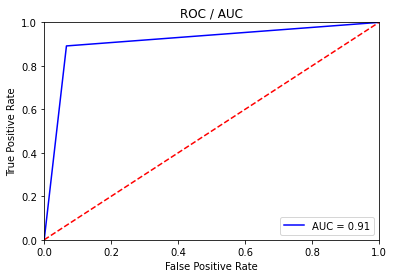

In [155]:
#Code taken from https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
#Generating ROC and AUC for Linear & C=1

# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC / AUC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [156]:
#Testing importance of each attribute
feat_labels = X.columns[:]

forest = RandomForestClassifier(random_state = 10)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1] 

for f in range(X_train.shape[1]):
    if f < 15:
        print("%2d) %-*s %f" % (f + 1, 41, feat_labels[indices[f]], importances[indices[f]]))


 1) check                                     0.333252
 2) com                                       0.224855
 3) subscribe                                 0.189099
 4) please                                    0.080526
 5) channel                                   0.067594
 6) youtube                                   0.047107
 7) views                                     0.027215
 8) song                                      0.019330
 9) love                                      0.011023


In [157]:
#Preparing variables for training
X=dfNew.drop(columns = ['AUTHOR','CONTENT','CLASS','love','song','views'])
y=dfNew['CLASS']

#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [158]:
#SVC: Testing several kernal types and C values
kernels = ['linear', 'rbf', 'poly']
C_values = [0.01, 0.1, 0.5, 1, 5, 10]
for kernel in kernels: 
    for c_val in C_values: 
        model = SVC(kernel=kernel, C=c_val, probability = True, random_state=10)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        print("using kernel {}".format(kernel) + ", C value is {}".format(c_val) +
              ", the acc is {0:.3f}".format(accuracy_score(y_test, pred)))
        print(confusion_matrix(y_test, pred))

using kernel linear, C value is 0.01, the acc is 0.843
[[276  25]
 [ 67 219]]
using kernel linear, C value is 0.1, the acc is 0.901
[[274  27]
 [ 31 255]]
using kernel linear, C value is 0.5, the acc is 0.901
[[274  27]
 [ 31 255]]
using kernel linear, C value is 1, the acc is 0.901
[[274  27]
 [ 31 255]]
using kernel linear, C value is 5, the acc is 0.901
[[274  27]
 [ 31 255]]
using kernel linear, C value is 10, the acc is 0.901
[[274  27]
 [ 31 255]]
using kernel rbf, C value is 0.01, the acc is 0.896
[[269  32]
 [ 29 257]]
using kernel rbf, C value is 0.1, the acc is 0.901
[[274  27]
 [ 31 255]]
using kernel rbf, C value is 0.5, the acc is 0.901
[[274  27]
 [ 31 255]]
using kernel rbf, C value is 1, the acc is 0.901
[[274  27]
 [ 31 255]]
using kernel rbf, C value is 5, the acc is 0.901
[[274  27]
 [ 31 255]]
using kernel rbf, C value is 10, the acc is 0.901
[[274  27]
 [ 31 255]]
using kernel poly, C value is 0.01, the acc is 0.891
[[275  26]
 [ 38 248]]
using kernel poly, C value

In [159]:
#SGDClassification
X=dfNew.drop(columns = ['AUTHOR','CONTENT','CLASS','love','song','views'])
y=dfNew['CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

losses = ['hinge', 'log_loss', 'log', 'modified_huber', 
          'squared_hinge', 'perceptron', 'squared_error',
          'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
penalties = ['l1','l2',None]
alphas = [0.001, .1, 1, 5, 10]
for _loss in losses: 
    for _penalty in penalties:
        for _alpha in alphas:
            model = SGDClassifier(loss=_loss, penalty=_penalty, alpha=_alpha, random_state=10)
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
            print("using loss {}".format(_loss) + ",  penalty is {}".format(_penalty) +
                  ",  alpha is {}".format(_alpha) + ", the acc is {0:.3f}".format(accuracy_score(y_test, pred)))
            print(confusion_matrix(y_test, pred))
            print(accuracy_score(y_test, pred))

using loss hinge,  penalty is l1,  alpha is 0.001, the acc is 0.901
[[274  27]
 [ 31 255]]
0.9011925042589438
using loss hinge,  penalty is l1,  alpha is 0.1, the acc is 0.726
[[293   8]
 [153 133]]
0.7257240204429302
using loss hinge,  penalty is l1,  alpha is 1, the acc is 0.513
[[301   0]
 [286   0]]
0.5127768313458262
using loss hinge,  penalty is l1,  alpha is 5, the acc is 0.513
[[301   0]
 [286   0]]
0.5127768313458262
using loss hinge,  penalty is l1,  alpha is 10, the acc is 0.513
[[301   0]
 [286   0]]
0.5127768313458262
using loss hinge,  penalty is l2,  alpha is 0.001, the acc is 0.901
[[274  27]
 [ 31 255]]
0.9011925042589438
using loss hinge,  penalty is l2,  alpha is 0.1, the acc is 0.813
[[289  12]
 [ 98 188]]
0.8126064735945485
using loss hinge,  penalty is l2,  alpha is 1, the acc is 0.530
[[301   0]
 [276  10]]
0.5298126064735945
using loss hinge,  penalty is l2,  alpha is 5, the acc is 0.513
[[301   0]
 [286   0]]
0.5127768313458262
using loss hinge,  penalty is l2,

C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\eddie\anaconda3\lib\sit

[[274  27]
 [ 31 255]]
0.9011925042589438
using loss log,  penalty is l2,  alpha is 0.1, the acc is 0.891
[[275  26]
 [ 38 248]]
0.8909710391822828
using loss log,  penalty is l2,  alpha is 1, the acc is 0.809
[[289  12]
 [100 186]]
0.8091993185689949
using loss log,  penalty is l2,  alpha is 5, the acc is 0.513
[[301   0]
 [286   0]]
0.5127768313458262
using loss log,  penalty is l2,  alpha is 10, the acc is 0.513
[[301   0]
 [286   0]]
0.5127768313458262
using loss log,  penalty is None,  alpha is 0.001, the acc is 0.901
[[274  27]
 [ 31 255]]
0.9011925042589438
using loss log,  penalty is None,  alpha is 0.1, the acc is 0.891
[[275  26]
 [ 38 248]]
0.8909710391822828
using loss log,  penalty is None,  alpha is 1, the acc is 0.886
[[270  31]
 [ 36 250]]
0.8858603066439523
using loss log,  penalty is None,  alpha is 5, the acc is 0.710
[[300   1]
 [169 117]]
0.7103918228279387
using loss log,  penalty is None,  alpha is 10, the acc is 0.520
[[301   0]
 [282   4]]
0.5195911413969335
us

C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


using loss squared_hinge,  penalty is l1,  alpha is 0.1, the acc is 0.898
[[275  26]
 [ 34 252]]
0.8977853492333902
using loss squared_hinge,  penalty is l1,  alpha is 1, the acc is 0.487
[[  0 301]
 [  0 286]]
0.48722316865417375
using loss squared_hinge,  penalty is l1,  alpha is 5, the acc is 0.513
[[301   0]
 [286   0]]
0.5127768313458262
using loss squared_hinge,  penalty is l1,  alpha is 10, the acc is 0.513
[[301   0]
 [286   0]]
0.5127768313458262
using loss squared_hinge,  penalty is l2,  alpha is 0.001, the acc is 0.767
[[288  13]
 [124 162]]
0.7666098807495741
using loss squared_hinge,  penalty is l2,  alpha is 0.1, the acc is 0.891
[[275  26]
 [ 38 248]]
0.8909710391822828
using loss squared_hinge,  penalty is l2,  alpha is 1, the acc is 0.891
[[275  26]
 [ 38 248]]
0.8909710391822828
using loss squared_hinge,  penalty is l2,  alpha is 5, the acc is 0.843
[[276  25]
 [ 67 219]]
0.8432708688245315
using loss squared_hinge,  penalty is l2,  alpha is 10, the acc is 0.513
[[301

C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[[289  12]
 [100 186]]
0.8091993185689949
using loss perceptron,  penalty is l1,  alpha is 0.001, the acc is 0.901
[[274  27]
 [ 31 255]]
0.9011925042589438
using loss perceptron,  penalty is l1,  alpha is 0.1, the acc is 0.487
[[  0 301]
 [  0 286]]
0.48722316865417375
using loss perceptron,  penalty is l1,  alpha is 1, the acc is 0.487
[[  0 301]
 [  0 286]]
0.48722316865417375
using loss perceptron,  penalty is l1,  alpha is 5, the acc is 0.487
[[  0 301]
 [  0 286]]
0.48722316865417375
using loss perceptron,  penalty is l1,  alpha is 10, the acc is 0.513
[[301   0]
 [286   0]]
0.5127768313458262
using loss perceptron,  penalty is l2,  alpha is 0.001, the acc is 0.901
[[274  27]
 [ 31 255]]
0.9011925042589438
using loss perceptron,  penalty is l2,  alpha is 0.1, the acc is 0.492
[[  5 296]
 [  2 284]]
0.49233390119250425
using loss perceptron,  penalty is l2,  alpha is 1, the acc is 0.492
[[  5 296]
 [  2 284]]
0.49233390119250425
using loss perceptron,  penalty is l2,  alpha is 5, 

In [167]:
#DecisionTreeClassifier:
model = DecisionTreeClassifier(random_state = 10)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))

[[274  27]
 [ 31 255]]
0.9011925042589438


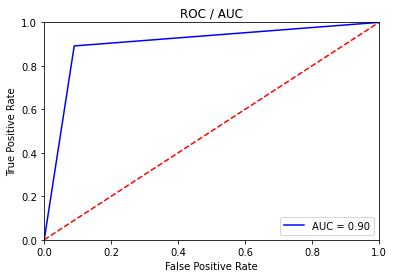

In [168]:
#Code taken from https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
#Generating ROC and AUC for Linear & C=1

# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC / AUC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [161]:
#Nothing was better

In [166]:
dfFinal = dfAll

dfFinal['check'] = check
dfFinal['com'] = com
dfFinal['please'] = please
dfFinal['youtube'] = youtube
dfFinal['subscribe'] = subscribe
dfFinal['channel'] = channel
dfFinal['song'] = song
dfFinal['love'] = love
dfFinal['views'] = views
dfFinal

,AUTHOR,CONTENT,CLASS,C_LEN,A_LEN,C_SPEC,A_SPEC,check,com,please,youtube,subscribe,channel,song,love,views
0,Julius NM,"Huh, anyway check out this you[tube] channel: ...",1,56,9,3,0,1,0,0,0,0,1,0,0,0
1,adam riyati,Hey guys check out my new channel and our firs...,1,166,11,7,0,1,1,1,0,1,1,0,0,0
2,Evgeny Murashkin,just for test I have to say murdev.com,1,38,16,0,0,0,1,0,0,0,0,0,0,0
3,ElNino Melendez,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,48,15,2,0,0,0,0,0,0,1,0,0,0
4,GsMega,watch?v=vtaRGgvGtWQ Check this out .﻿,1,39,6,2,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951,Katie Mettam,I love this song because we sing it at Camp al...,0,58,12,2,0,0,0,0,0,0,0,1,1,0
1952,Sabina Pearson-Smith,I love this song for two reasons: 1.it is abou...,0,93,20,1,1,0,0,0,0,0,0,1,1,0
1953,jeffrey jules,wow,0,3,13,0,0,0,0,0,0,0,0,0,0,0
1954,Aishlin Maciel,Shakira u are so wiredo,0,23,14,0,0,0,0,0,0,0,0,0,0,0


In [169]:
#Preparing variables for training
X=dfFinal.drop(columns = ['AUTHOR','CONTENT','CLASS'])
y=dfFinal['CLASS']

#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [170]:
#SVC: Testing several kernal types and C values
kernels = ['linear', 'rbf', 'poly']
C_values = [0.01, 0.1, 0.5, 1, 5, 10]
for kernel in kernels: 
    for c_val in C_values: 
        model = SVC(kernel=kernel, C=c_val, probability = True, random_state=10)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        print("using kernel {}".format(kernel) + ", C value is {}".format(c_val) +
              ", the acc is {0:.3f}".format(accuracy_score(y_test, pred)))
        print(confusion_matrix(y_test, pred))

using kernel linear, C value is 0.01, the acc is 0.877
[[271  30]
 [ 42 244]]
using kernel linear, C value is 0.1, the acc is 0.901
[[274  27]
 [ 31 255]]
using kernel linear, C value is 0.5, the acc is 0.908
[[280  21]
 [ 33 253]]
using kernel linear, C value is 1, the acc is 0.908
[[280  21]
 [ 33 253]]
using kernel linear, C value is 5, the acc is 0.908
[[280  21]
 [ 33 253]]
using kernel linear, C value is 10, the acc is 0.908
[[280  21]
 [ 33 253]]
using kernel rbf, C value is 0.01, the acc is 0.627
[[254  47]
 [172 114]]
using kernel rbf, C value is 0.1, the acc is 0.605
[[219  82]
 [150 136]]
using kernel rbf, C value is 0.5, the acc is 0.617
[[189 112]
 [113 173]]
using kernel rbf, C value is 1, the acc is 0.618
[[185 116]
 [108 178]]
using kernel rbf, C value is 5, the acc is 0.618
[[168 133]
 [ 91 195]]
using kernel rbf, C value is 10, the acc is 0.646
[[165 136]
 [ 72 214]]
using kernel poly, C value is 0.01, the acc is 0.596
[[296   5]
 [232  54]]
using kernel poly, C value

In [171]:
#SGDClassification
X=dfFinal.drop(columns = ['AUTHOR','CONTENT','CLASS'])
y=dfFinal['CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

losses = ['hinge', 'log_loss', 'log', 'modified_huber', 
          'squared_hinge', 'perceptron', 'squared_error',
          'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
penalties = ['l1','l2',None]
alphas = [0.001, .1, 1, 5, 10]
for _loss in losses: 
    for _penalty in penalties:
        for _alpha in alphas:
            model = SGDClassifier(loss=_loss, penalty=_penalty, alpha=_alpha, random_state=10)
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
            print("using loss {}".format(_loss) + ",  penalty is {}".format(_penalty) +
                  ",  alpha is {}".format(_alpha) + ", the acc is {0:.3f}".format(accuracy_score(y_test, pred)))
            print(confusion_matrix(y_test, pred))
            print(accuracy_score(y_test, pred))

using loss hinge,  penalty is l1,  alpha is 0.001, the acc is 0.894
[[273  28]
 [ 34 252]]
0.8943781942078365
using loss hinge,  penalty is l1,  alpha is 0.1, the acc is 0.637
[[202  99]
 [114 172]]
0.637137989778535
using loss hinge,  penalty is l1,  alpha is 1, the acc is 0.620
[[193 108]
 [115 171]]
0.6201022146507666
using loss hinge,  penalty is l1,  alpha is 5, the acc is 0.620
[[184 117]
 [106 180]]
0.6201022146507666
using loss hinge,  penalty is l1,  alpha is 10, the acc is 0.613
[[217  84]
 [143 143]]
0.6132879045996593
using loss hinge,  penalty is l2,  alpha is 0.001, the acc is 0.780
[[220  81]
 [ 48 238]]
0.7802385008517888
using loss hinge,  penalty is l2,  alpha is 0.1, the acc is 0.736
[[199 102]
 [ 53 233]]
0.7359454855195912
using loss hinge,  penalty is l2,  alpha is 1, the acc is 0.634
[[211  90]
 [125 161]]
0.6337308347529813
using loss hinge,  penalty is l2,  alpha is 5, the acc is 0.612
[[202  99]
 [129 157]]
0.6115843270868825
using loss hinge,  penalty is l2, 

C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\eddie\anaconda3\lib\sit

[[196 105]
 [115 171]]
0.6252129471890971
using loss log,  penalty is l1,  alpha is 1, the acc is 0.624
[[280  21]
 [200  86]]
0.6235093696763203
using loss log,  penalty is l1,  alpha is 5, the acc is 0.613
[[166 135]
 [ 92 194]]
0.6132879045996593
using loss log,  penalty is l1,  alpha is 10, the acc is 0.513
[[301   0]
 [286   0]]
0.5127768313458262
using loss log,  penalty is l2,  alpha is 0.001, the acc is 0.770
[[200 101]
 [ 34 252]]
0.7700170357751278
using loss log,  penalty is l2,  alpha is 0.1, the acc is 0.702
[[207  94]
 [ 81 205]]
0.7018739352640545
using loss log,  penalty is l2,  alpha is 1, the acc is 0.651
[[281  20]
 [185 101]]
0.6507666098807495
using loss log,  penalty is l2,  alpha is 5, the acc is 0.606
[[178 123]
 [108 178]]
0.606473594548552
using loss log,  penalty is l2,  alpha is 10, the acc is 0.606
[[182 119]
 [112 174]]
0.606473594548552
using loss log,  penalty is None,  alpha is 0.001, the acc is 0.901
[[268  33]
 [ 25 261]]
0.9011925042589438
using loss

C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[[293   8]
 [284   2]]
0.5025553662691652
using loss squared_error,  penalty is None,  alpha is 0.1, the acc is 0.492
[[  6 295]
 [  3 283]]
0.49233390119250425
using loss squared_error,  penalty is None,  alpha is 1, the acc is 0.629
[[155 146]
 [ 72 214]]
0.6286201022146508
using loss squared_error,  penalty is None,  alpha is 5, the acc is 0.652
[[205  96]
 [108 178]]
0.6524701873935264
using loss squared_error,  penalty is None,  alpha is 10, the acc is 0.734
[[283  18]
 [138 148]]
0.7342419080068143
using loss huber,  penalty is l1,  alpha is 0.001, the acc is 0.513
[[301   0]
 [286   0]]
0.5127768313458262
using loss huber,  penalty is l1,  alpha is 0.1, the acc is 0.581
[[299   2]
 [244  42]]
0.5809199318568995
using loss huber,  penalty is l1,  alpha is 1, the acc is 0.613
[[171 130]
 [ 97 189]]
0.6132879045996593
using loss huber,  penalty is l1,  alpha is 5, the acc is 0.513
[[301   0]
 [286   0]]
0.5127768313458262
using loss huber,  penalty is l1,  alpha is 10, the acc is 0

In [172]:
#DecisionTreeClassifier:
model = DecisionTreeClassifier(random_state = 10)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))

[[259  42]
 [ 25 261]]
0.8858603066439523


In [173]:
#SVC with kernel=linear and C=1 had highest acc
model = SVC(kernel='linear', C=1, probability = True, random_state=10)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))

[[280  21]
 [ 33 253]]
0.9080068143100511


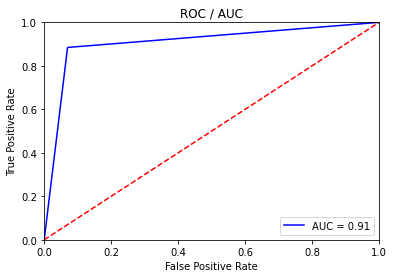

In [174]:
#Code taken from https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
#Generating ROC and AUC for Linear & C=1

# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC / AUC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [175]:
#Testing importance of each attribute
feat_labels = X.columns[:]

forest = RandomForestClassifier(random_state = 10)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1] 

for f in range(X_train.shape[1]):
    if f < 15:
        print("%2d) %-*s %f" % (f + 1, 41, feat_labels[indices[f]], importances[indices[f]]))


 1) C_LEN                                     0.218954
 2) check                                     0.196641
 3) C_SPEC                                    0.127033
 4) subscribe                                 0.120458
 5) com                                       0.089619
 6) A_LEN                                     0.067099
 7) channel                                   0.052361
 8) please                                    0.046266
 9) youtube                                   0.030081
10) song                                      0.021453
11) views                                     0.017116
12) love                                      0.011446
13) A_SPEC                                    0.001475


In [176]:
#Preparing variables for training
X=dfFinal.drop(columns = ['AUTHOR','CONTENT','CLASS','A_SPEC','love','views','song'])
y=dfFinal['CLASS']

#Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [177]:
#SVC: Testing several kernal types and C values
kernels = ['linear', 'rbf', 'poly']
C_values = [0.01, 0.1, 0.5, 1, 5, 10]
for kernel in kernels: 
    for c_val in C_values: 
        model = SVC(kernel=kernel, C=c_val, probability = True, random_state=10)
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        print("using kernel {}".format(kernel) + ", C value is {}".format(c_val) +
              ", the acc is {0:.3f}".format(accuracy_score(y_test, pred)))
        print(confusion_matrix(y_test, pred))

using kernel linear, C value is 0.01, the acc is 0.877
[[274  27]
 [ 45 241]]
using kernel linear, C value is 0.1, the acc is 0.901
[[274  27]
 [ 31 255]]
using kernel linear, C value is 0.5, the acc is 0.901
[[274  27]
 [ 31 255]]
using kernel linear, C value is 1, the acc is 0.901
[[274  27]
 [ 31 255]]
using kernel linear, C value is 5, the acc is 0.901
[[274  27]
 [ 31 255]]
using kernel linear, C value is 10, the acc is 0.901
[[274  27]
 [ 31 255]]
using kernel rbf, C value is 0.01, the acc is 0.627
[[254  47]
 [172 114]]
using kernel rbf, C value is 0.1, the acc is 0.605
[[219  82]
 [150 136]]
using kernel rbf, C value is 0.5, the acc is 0.615
[[188 113]
 [113 173]]
using kernel rbf, C value is 1, the acc is 0.618
[[185 116]
 [108 178]]
using kernel rbf, C value is 5, the acc is 0.620
[[169 132]
 [ 91 195]]
using kernel rbf, C value is 10, the acc is 0.646
[[165 136]
 [ 72 214]]
using kernel poly, C value is 0.01, the acc is 0.596
[[296   5]
 [232  54]]
using kernel poly, C value

In [178]:
#SGDClassification
X=dfFinal.drop(columns = ['AUTHOR','CONTENT','CLASS','A_SPEC','love','views','song'])
y=dfFinal['CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

losses = ['hinge', 'log_loss', 'log', 'modified_huber', 
          'squared_hinge', 'perceptron', 'squared_error',
          'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']
penalties = ['l1','l2',None]
alphas = [0.001, .1, 1, 5, 10]
for _loss in losses: 
    for _penalty in penalties:
        for _alpha in alphas:
            model = SGDClassifier(loss=_loss, penalty=_penalty, alpha=_alpha, random_state=10)
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
            print("using loss {}".format(_loss) + ",  penalty is {}".format(_penalty) +
                  ",  alpha is {}".format(_alpha) + ", the acc is {0:.3f}".format(accuracy_score(y_test, pred)))
            print(confusion_matrix(y_test, pred))
            print(accuracy_score(y_test, pred))

using loss hinge,  penalty is l1,  alpha is 0.001, the acc is 0.891
[[279  22]
 [ 42 244]]
0.8909710391822828
using loss hinge,  penalty is l1,  alpha is 0.1, the acc is 0.637
[[202  99]
 [114 172]]
0.637137989778535
using loss hinge,  penalty is l1,  alpha is 1, the acc is 0.620
[[193 108]
 [115 171]]
0.6201022146507666
using loss hinge,  penalty is l1,  alpha is 5, the acc is 0.620
[[184 117]
 [106 180]]
0.6201022146507666
using loss hinge,  penalty is l1,  alpha is 10, the acc is 0.613
[[217  84]
 [143 143]]
0.6132879045996593
using loss hinge,  penalty is l2,  alpha is 0.001, the acc is 0.748
[[209  92]
 [ 56 230]]
0.747870528109029
using loss hinge,  penalty is l2,  alpha is 0.1, the acc is 0.734
[[219  82]
 [ 74 212]]
0.7342419080068143
using loss hinge,  penalty is l2,  alpha is 1, the acc is 0.639
[[203  98]
 [114 172]]
0.6388415672913118
using loss hinge,  penalty is l2,  alpha is 5, the acc is 0.613
[[198 103]
 [124 162]]
0.6132879045996593
using loss hinge,  penalty is l2,  

C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\Users\eddie\anaconda3\lib\sit

0.8807495741056218
using loss log,  penalty is None,  alpha is 1, the acc is 0.811
[[275  26]
 [ 85 201]]
0.8109028960817717
using loss log,  penalty is None,  alpha is 5, the acc is 0.697
[[232  69]
 [109 177]]
0.696763202725724
using loss log,  penalty is None,  alpha is 10, the acc is 0.627
[[236  65]
 [154 132]]
0.626916524701874
using loss modified_huber,  penalty is l1,  alpha is 0.001, the acc is 0.891
[[275  26]
 [ 38 248]]
0.8909710391822828
using loss modified_huber,  penalty is l1,  alpha is 0.1, the acc is 0.807
[[208  93]
 [ 20 266]]
0.807495741056218
using loss modified_huber,  penalty is l1,  alpha is 1, the acc is 0.606
[[217  84]
 [147 139]]
0.606473594548552
using loss modified_huber,  penalty is l1,  alpha is 5, the acc is 0.627
[[248  53]
 [166 120]]
0.626916524701874
using loss modified_huber,  penalty is l1,  alpha is 10, the acc is 0.625
[[283  18]
 [202  84]]
0.6252129471890971
using loss modified_huber,  penalty is l2,  alpha is 0.001, the acc is 0.525
[[300   

C:\Users\eddie\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


using loss perceptron,  penalty is None,  alpha is 10, the acc is 0.610
[[226  75]
 [154 132]]
0.6098807495741057
using loss squared_error,  penalty is l1,  alpha is 0.001, the acc is 0.499
[[292   9]
 [285   1]]
0.4991482112436116
using loss squared_error,  penalty is l1,  alpha is 0.1, the acc is 0.499
[[ 10 291]
 [  3 283]]
0.4991482112436116
using loss squared_error,  penalty is l1,  alpha is 1, the acc is 0.658
[[228  73]
 [128 158]]
0.6575809199318569
using loss squared_error,  penalty is l1,  alpha is 5, the acc is 0.777
[[286  15]
 [116 170]]
0.7768313458262351
using loss squared_error,  penalty is l1,  alpha is 10, the acc is 0.733
[[286  15]
 [142 144]]
0.7325383304940375
using loss squared_error,  penalty is l2,  alpha is 0.001, the acc is 0.513
[[301   0]
 [286   0]]
0.5127768313458262
using loss squared_error,  penalty is l2,  alpha is 0.1, the acc is 0.426
[[219  82]
 [255  31]]
0.42589437819420783
using loss squared_error,  penalty is l2,  alpha is 1, the acc is 0.407
[[

In [179]:
#DecisionTreeClassifier:
model = DecisionTreeClassifier(random_state = 10)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))

[[258  43]
 [ 30 256]]
0.8756388415672913


In [180]:
#SVC with kernel=linear and C=1 had highest acc
model = SVC(kernel='linear', C=1, probability = True, random_state=10)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))

[[274  27]
 [ 31 255]]
0.9011925042589438


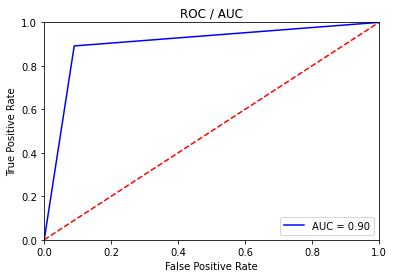

In [181]:
#Code taken from https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
#Generating ROC and AUC for Linear & C=1

# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC / AUC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()